In [1]:
import pandas as pd

In [2]:
# show all columns
pd.set_option('display.max_columns', None)

In [3]:
import pandas as pd
from pathlib import Path

raw_root = Path("data/raw")  # adjust
for b in ["bank_s","bank_m","bank_l"]:
    acc = pd.read_csv(raw_root/b/"accounts.csv")
    sar = pd.read_csv(raw_root/b/"sar_accounts.csv")
    sar_yes = sar[sar["IS_SAR"]=="YES"]["ACCOUNT_ID"].nunique()
    print(b, "accounts=", acc["acct_id"].nunique(), "sar_yes=", sar_yes, "rate=", sar_yes/acc["acct_id"].nunique())


bank_s accounts= 1800 sar_yes= 125 rate= 0.06944444444444445
bank_m accounts= 3613 sar_yes= 174 rate= 0.04815942430113479
bank_l accounts= 6630 sar_yes= 378 rate= 0.05701357466063348


In [8]:
# All code/comments in English.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data from your log
df = pd.DataFrame(
    {
        "bank": ["bank_s", "bank_m", "bank_l"],
        "accounts": [1800, 3613, 6630],
        "sar_yes": [125, 174, 378],
        "tx_total": [22118, 50701, 142029],
        "tx_internal": [84, 3012, 76782],
        "tx_cross": [22034, 47689, 65247],
    }
)

# Derived metrics
df["sar_rate"] = df["sar_yes"] / df["accounts"]
df["tx_per_acct"] = df["tx_total"] / df["accounts"]
df["cross_ratio"] = df["tx_cross"] / df["tx_total"]

print(df[["bank", "accounts", "sar_yes", "sar_rate", "tx_total", "tx_internal", "tx_cross", "cross_ratio", "tx_per_acct"]])

banks = df["bank"].tolist()
x = np.arange(len(banks))



     bank  accounts  sar_yes  sar_rate  tx_total  tx_internal  tx_cross  \
0  bank_s      1800      125  0.069444     22118           84     22034   
1  bank_m      3613      174  0.048159     50701         3012     47689   
2  bank_l      6630      378  0.057014    142029        76782     65247   

   cross_ratio  tx_per_acct  
0     0.996202    12.287778  
1     0.940593    14.032937  
2     0.459392    21.422172  


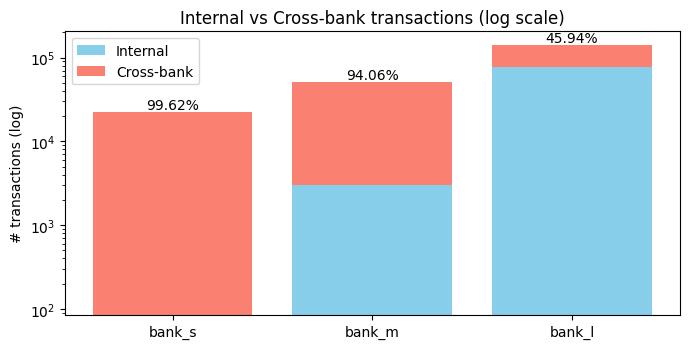

In [10]:

# -------------------------
# Figure  Internal vs Cross-bank (stacked) + annotate cross ratio
# -------------------------
fig = plt.figure(figsize=(7, 3.6))
plt.bar(banks, df["tx_internal"].values, label="Internal", color='skyblue')
plt.bar(banks, df["tx_cross"].values, bottom=df["tx_internal"].values, label="Cross-bank", color='salmon')
plt.yscale("log")
plt.ylabel("# transactions (log)")
plt.title("Internal vs Cross-bank transactions (log scale)")

# Annotate cross-bank share on top of each stacked bar
for i in range(len(banks)):
    total = df.loc[i, "tx_total"]
    ratio = df.loc[i, "cross_ratio"]
    plt.text(i, total, f"{ratio*100:.2f}%", ha="center", va="bottom", fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

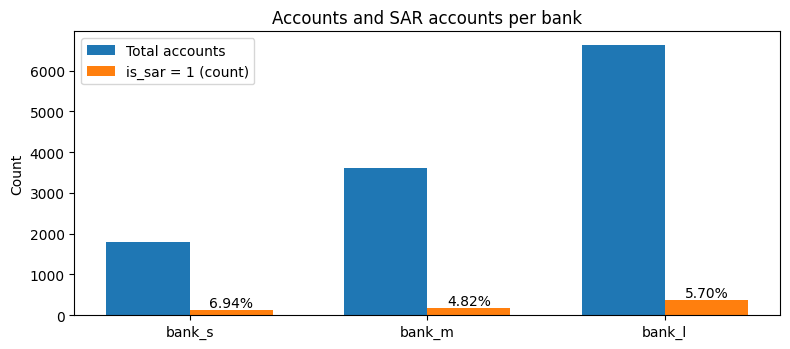

In [11]:
# -------------------------
# Figure Accounts vs SAR count (grouped) + annotate SAR rate
# -------------------------
width = 0.35
fig = plt.figure(figsize=(8, 3.6))
plt.bar(x - width/2, df["accounts"].values, width, label="Total accounts")
plt.bar(x + width/2, df["sar_yes"].values, width, label="is_sar = 1 (count)")

plt.xticks(x, banks)
plt.ylabel("Count")
plt.title("Accounts and SAR accounts per bank")

# Annotate SAR rate on top of SAR bars
for i in range(len(banks)):
    sar_cnt = df.loc[i, "sar_yes"]
    rate = df.loc[i, "sar_rate"]
    plt.text(i + width/2, sar_cnt, f"{rate*100:.2f}%", ha="center", va="bottom", fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()